In [78]:
from mmd import MMD_3_Sample_Test 
import numpy as np
import matplotlib.pyplot as plt

# Generating distributions + Plotting

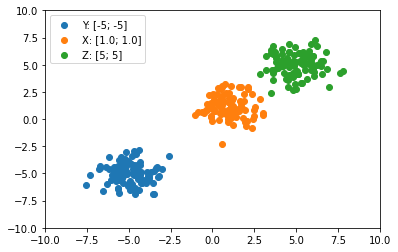

In [79]:
N = 100
gamma = 0.6
center = 5

moving_centre = (1 - gamma) * (-center) + gamma * center
scale = 1

m_x = [-center, moving_centre, center]
m_y = [-center, moving_centre, center]

Xs = []
Ys = []
for i in range(3):
    Xs.append (np.random.normal (m_x[i], scale, N))
    Ys.append (np.random.normal (m_y[i], scale, N))
    
names = ['Y', 'X', 'Z']
for i in range(3):
    plt.scatter (Xs[i],Ys[i],label = names[i] + ': [' + str(m_x[i]) + '; ' + str(m_y[i]) + ']')
plt.legend()
plt.xlim(-10,10)
plt.ylim(-10,10)
#plt.title('Generated Datasets')
plt.show()

In [72]:
np.array((Xs[0],Ys[0])).T.shape

(100, 2)

# Testing

In [80]:
gamma = 0.5
def test(gamma):

    mu = 5
    N = 100
    moving_centre = (1 - gamma) * (-mu) + gamma * mu
    scale = 1

    m_x = [-mu, moving_centre, mu]
    m_y = [-mu, moving_centre, mu]

    Xs = []
    Ys = []
    for i in range(3):
        Xs.append (np.random.normal (m_x[i], scale, N))
        Ys.append (np.random.normal (m_y[i], scale, N))

    Y = np.array((Xs[0],Ys[0])).T
    X = np.array((Xs[1],Ys[1])).T
    Z = np.array((Xs[2],Ys[2])).T

    # TESTING
    return MMD_3_Sample_Test (X, Y, Z)

## Power of the proposed methods

In [81]:
n_reps = 100
gammas = np.repeat (np.arange(0,1,0.01), n_reps)

In [82]:
p_vals = [test(gamma)[0] for gamma in gammas]

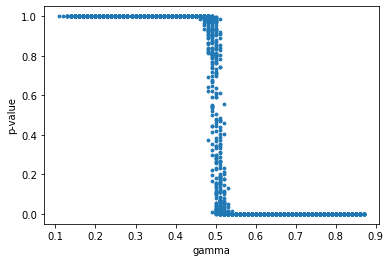

In [84]:
plt.scatter(gammas, p_vals, s=8)
plt.xlabel('gamma')
plt.ylabel('p-value')
#plt.title ('X_centre = (1 - gamma) * (-5) + gamma * 5')
plt.show()

## Power of the tests

In [85]:
n_reps = 100
gammas = np.arange(0.5,0.71,0.005)
power = []

for gamma in gammas:
    count = 0
    for i in range(n_reps):
        p_val = test(gamma)[0]
        if p_val < 0.05:
            count += 1
    power.append(count/n_reps)

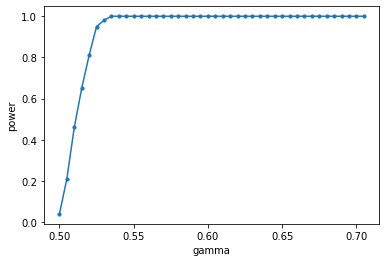

In [86]:
plt.scatter(gammas, power, s=10)
plt.plot(gammas, power)
plt.xlabel('gamma')
plt.ylabel('power')
#plt.title ('X_centre = (1 - gamma) * (-5) + gamma * 5')
plt.show()